In [101]:
from numpy import *
import json
import urllib
from time import sleep
import matplotlib
import matplotlib.pyplot as plt

In [66]:
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine)
        dataMat.append(fltLine)
    return dataMat

In [67]:
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids

In [68]:
datMat = mat(loadDataSet('testSet.txt'))

In [69]:
min(datMat[:,0])

matrix([[-3.642001]])

In [70]:
min(datMat[:,1])

matrix([[-3.181888]])

In [71]:
max(datMat[:,1])

matrix([[14.739025]])

In [72]:
max(datMat[:,0])

matrix([[3.01015]])

In [73]:
randCent(datMat, 2)

matrix([[-2.97879999,  0.82108671,  0.29458297],
        [ 0.63442908,  4.84363092,  0.01095521]])

In [74]:
distEclud(datMat[0], datMat[1])

9.543629647362316

In [75]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
                clusterAssment[i,:] = minIndex,minDist**2
        print centroids
        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:] = mean(ptsInClust, axis=0)
    return centroids, clusterAssment

In [76]:
datMat = mat(loadDataSet('testSet.txt'))

In [77]:
myCentroids, clustAssing = kMeans(datMat,4)

[[-1.23640664 10.21446205  0.41975326]
 [-1.64357045  5.3522385   0.49410224]
 [-3.36584568  2.88253884  0.32925403]
 [-3.47007025 -2.88113207  0.56750464]]
[[ 0.27220728 10.75407423  0.06382979]
 [ 0.22000844  4.87507516  0.90625   ]
 [-0.43892118  1.06526991  1.        ]
 [-1.2004659  -1.5550863   1.        ]]
[[ 2.22053667e-01  1.08922436e+01  4.44444444e-02]
 [ 2.48238379e-01  5.45941928e+00  8.62068966e-01]
 [-1.11053333e-03  1.63627400e+00  1.00000000e+00]
 [-1.28849545e+00 -1.40065736e+00  1.00000000e+00]]
[[ 0.23614175 10.9566492   0.04545455]
 [ 0.14494896  5.89087158  0.80769231]
 [ 0.15872421  1.98752658  1.        ]
 [-1.28849545 -1.40065736  1.        ]]
[[ 0.16245633 11.08085274  0.        ]
 [ 0.30305115  6.14853096  0.81481481]
 [ 0.18455763  2.16546005  1.        ]
 [-1.29257683 -1.24490767  1.        ]]
[[ 0.16245633 11.08085274  0.        ]
 [ 0.37641704  6.31607868  0.8       ]
 [ 0.10999965  2.4596187   1.        ]
 [-1.187105   -1.14455046  1.        ]]
[[ 0.16245

In [78]:
myCentroids

matrix([[ 1.62456333e-01,  1.10808527e+01,  0.00000000e+00],
        [ 5.06856217e-01,  6.47233630e+00,  7.82608696e-01],
        [ 7.12738095e-03,  2.75173529e+00,  1.00000000e+00],
        [-1.11637957e+00, -1.03107079e+00,  1.00000000e+00]])

In [79]:
clustAssing

matrix([[ 0.        ,  0.        ],
        [ 2.        ,  6.19485706],
        [ 1.        ,  2.44625604],
        [ 1.        ,  3.58951871],
        [ 0.        ,  0.        ],
        [ 1.        ,  7.40111387],
        [ 0.        ,  0.        ],
        [ 1.        ,  3.2166464 ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 1.        ,  8.93490925],
        [ 0.        ,  0.        ],
        [ 2.        ,  3.73068717],
        [ 0.        ,  0.        ],
        [ 1.        ,  1.57320703],
        [ 2.        , 20.59017687],
        [ 1.        ,  3.51761237],
        [ 2.        ,  2.80493995],
        [ 3.        ,  3.50442572],
        [ 1.        ,  7.48278616],
        [ 2.        ,  6.48775484],
        [ 3.        ,  8.74250124],
        [ 0.        ,  0.        ],
        [ 3.        , 11.38757136],
        [ 2.        ,  2.03500747],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 3.        ,  1.811

In [85]:
def showPlt(datMat, alg=kMeans, numClust=4):
    myCentroids, clustAssing = alg(datMat, numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

In [113]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] 
    for j in range(m):
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment

[[ 1.50823067 -1.5782224   0.96655492]
 [-1.83593992 10.17359146  0.81659648]
 [-1.27054651  0.39931263  0.34360292]
 [ 2.06187272  7.64286222  0.65130072]]
[[-0.1731076  -1.4387152   1.        ]
 [-0.10888024 11.16136508  0.02702703]
 [-0.4871367   1.6848342   1.        ]
 [ 0.80390814  7.18889436  0.60714286]]
[[-1.08419109 -1.40828427  1.        ]
 [ 0.1312391  11.18330825  0.        ]
 [-0.14806404  2.45177404  1.        ]
 [ 0.5292518   6.6770888   0.72      ]]
[[-1.18710500e+00 -1.14455046e+00  1.00000000e+00]
 [ 1.61906683e-01  1.11383982e+01  0.00000000e+00]
 [-2.14881818e-03  2.64684573e+00  1.00000000e+00]
 [ 4.93445208e-01  6.56605096e+00  7.50000000e-01]]
[[-1.11637957e+00 -1.03107079e+00  1.00000000e+00]
 [ 1.61906683e-01  1.11383982e+01  0.00000000e+00]
 [ 7.12738095e-03  2.75173529e+00  1.00000000e+00]
 [ 4.93445208e-01  6.56605096e+00  7.50000000e-01]]


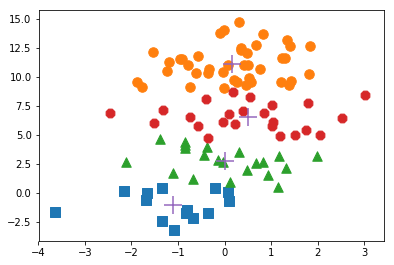

In [114]:
showPlt(datMat)

In [115]:
datMat3 = mat(loadDataSet('testSet2.txt'))

In [116]:
centList, myNewAssments = biKmeans(datMat3,3)

[[1.15702087 0.50697077]
 [2.28073746 1.15280365]]
[[-1.70351595  0.27408125]
 [ 2.93386365  3.12782785]]
('sseSplit, and notSplit: ', 126.0751866158818, 0.0)
('the bestCentToSplit is: ', 0)
('the len of bestClustAss is: ', 60)
[[-3.50920685 -2.69523347]
 [ 0.5488927   1.29577142]]
[[-0.659857   -2.75179183]
 [-2.55741873  2.74979559]]
[[-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]]
('sseSplit, and notSplit: ', 355.57770485774734, 126.07518661588179)
[[1.5498554  3.38200905]
 [2.91383257 2.04090407]]
[[2.00830612 3.640614  ]
 [3.550902   2.78597042]]
[[2.02712544 3.50141167]
 [3.67574036 2.82216836]]
('sseSplit, and notSplit: ', 33.11076726995082, 0.0)
('the bestCentToSplit is: ', 1)
('the len of bestClustAss is: ', 20)


In [117]:
centList

matrix([[-1.70351595,  0.27408125],
        [ 2.02712544,  3.50141167],
        [ 3.67574036,  2.82216836]])

[[-1.01245275 -1.82778531  0.77418043]
 [-2.67421871 13.42183277  0.31167649]]
[[-0.1729813   2.09311611  1.        ]
 [ 0.18950709 10.09846234  0.16071429]]
[[-0.23098741  2.09213514  0.97727273]
 [ 0.23508332 10.09923311  0.17857143]]
('sseSplit, and notSplit: ', 1401.1832479427817, 0.0)
('the bestCentToSplit is: ', 0)
('the len of bestClustAss is: ', 100)
[[-2.03997632  1.58801971  0.45996274]
 [-1.58719043 -0.78940296  0.39952984]]
[[ 0.14875121  3.65311966  0.96551724]
 [-0.96514873 -0.92576827  1.        ]]
[[ 0.18027648  3.84435663  0.96296296]
 [-0.88417124 -0.69080488  1.        ]]
[[ 0.22949704  3.92728288  0.96153846]
 [-0.89613161 -0.55863383  1.        ]]
('sseSplit, and notSplit: ', 64.09766367346707, 1382.6435274431517)
[[ 1.42855356 13.29136902  0.07903693]
 [-2.11133262  9.61454079  0.29794007]]
[[ 0.83630937 12.14190232  0.05263158]
 [-0.07365438  9.05029486  0.24324324]]
[[ 0.31580929 12.12096679  0.        ]
 [ 0.17453884  8.58293284  0.3125    ]]
[[ 0.22115019 11.9

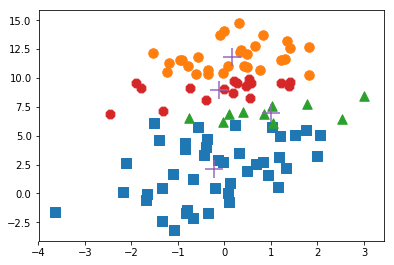

In [118]:
showPlt(datMat, alg=biKmeans)

[[-0.7902799   1.57479613]
 [ 2.81549309 -3.35593067]
 [ 0.0673237   1.51646154]
 [-1.23415079 -3.69582544]]
[[-2.85434624  3.12586329]
 [ 0.81867067 -3.34850767]
 [ 2.93386365  3.12782785]
 [-0.66596119 -2.78964725]]
[[-2.94737575  3.3263781 ]
 [ 0.54907857 -3.33938171]
 [ 2.93386365  3.12782785]
 [-1.002821   -2.47604923]]
[[-2.94737575  3.3263781 ]
 [ 0.35496167 -3.36033556]
 [ 2.93386365  3.12782785]
 [-1.12616164 -2.30193564]]


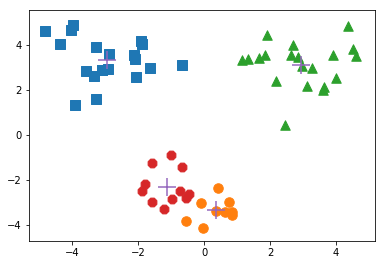

In [119]:
showPlt(datMat3)

[[ 1.00910973 -3.61569766]
 [-0.79155189  0.5091009 ]]
[[-0.26162575 -3.11178156]
 [-0.11993984  2.80246164]]
[[-0.45965615 -2.7782156 ]
 [-0.00675605  3.22710297]]
('sseSplit, and notSplit: ', 760.7692913692283, 0.0)
('the bestCentToSplit is: ', 0)
('the len of bestClustAss is: ', 60)
[[-1.34263042 -2.81488598]
 [-0.59902169 -1.95316891]]
[[-1.07271363 -3.0785125 ]
 [-0.05095117 -2.57801767]]
[[-1.19949912 -2.88385775]
 [ 0.0335725  -2.7077875 ]]
[[-1.25330489 -2.47552567]
 [ 0.18969282 -3.025871  ]]
[[-1.26405367 -2.209896  ]
 [ 0.19848727 -3.24320436]]
[[-1.1836084 -2.2507069]
 [ 0.2642961 -3.3057243]]
[[-1.12616164 -2.30193564]
 [ 0.35496167 -3.36033556]]
('sseSplit, and notSplit: ', 35.582027751311216, 744.0138313058336)
[[-1.69532702  3.71142173]
 [ 2.80830007  0.52941613]]
[[-2.37180191  3.3769933 ]
 [ 3.19301188  3.02431018]]
[[-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]]
('sseSplit, and notSplit: ', 149.41926453936503, 16.75546006339464)
('the bestCentToSplit is: ', 1)

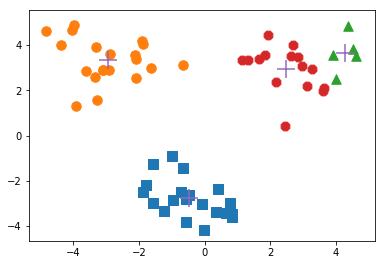

In [120]:
showPlt(datMat3, alg=biKmeans)

In [157]:
def geoGrab(stAddress, city):
    apiStem = 'http://where.yahooapis.com/geocode?'  #create a dict and constants for the goecoder
    params = {}
    params['flags'] = 'J'#JSON return type
    params['appid'] = 'aaa0VN6k'
    params['location'] = '%s %s' % (stAddress, city)
    url_params = urllib.parse.urlencode(params)
    yahooApi = apiStem + url_params      #print url_params
    print(yahooApi)
    c=urllib.request.urlopen(yahooApi)
    return json.loads(c.read())

def massPlaceFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print("%s\t%f\t%f" % (lineArr[0], lat, lng))
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
        else: print("error fetching")
        sleep(1)
    fw.close()

In [156]:
#geoResults = kMeans.geoGrab('1 VA Center', 'Augusta, ME') http://where.yahooapis.com/geocode?flags=J&location=1+VA+Center+Augusta%2C+ME&appid=ppp68N6k
#geoResults

In [160]:
#geoResults['ResultSet']['Error']
#geoResults['ResultSet']['Results'][0]['longitude']
#geoResults['ResultSet']['Results'][0]['latitude']

In [161]:
#massPlaceFind('portlandClubs.txt')

In [162]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = sin(vecA[0,1]*pi/100) * sin(vecB[0,1]*pi/100)
    b = cos(vecA[0,1]*pi/100) * cos(vecB[0,1]*pi/100) 
    return arccos(a + b)*6371.0 #pi is imported with numpy

def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.1,0.1]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

In [163]:
#clusterClubs